In [1]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/")

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
x_train = mnist.train.images[:55000,:]
x_train.shape


(55000, 784)

### Genetor

In [4]:
def generator(z):
    with tf.variable_scope("generator",reuse = tf.AUTO_REUSE):
        init = tf.contrib.layers.xavier_initializer()
        cov_1 = tf.layers.dense(inputs = z, units = 384 , activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        cov_2 = tf.layers.dense(inputs = cov_1, units = 256, activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        cov_3 = tf.layers.dense(inputs = cov_2, units = 128, activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        output_1 = tf.layers.dense(inputs = cov_3, units = 784, activation = tf.nn.tanh, kernel_initializer = init, use_bias = True)
        
        return output_1

### Discriminator

In [5]:
def discriminator(x):
    with tf.variable_scope("discriminator",reuse = tf.AUTO_REUSE):
        init = tf.contrib.layers.xavier_initializer()
        #cov_1 = tf.layers.dense(inputs = z, units = 128, activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        #cov_2 = tf.layers.dense(inputs = cov_1, units = 128, activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        cov_1 = tf.layers.dense(inputs = x, units = 128, activation = tf.nn.relu, kernel_initializer = init, use_bias = True)
        logit = tf.layers.dense(inputs = cov_1, units = 1, kernel_initializer = init, use_bias = True)
        
        return logit

### Loss Function

In [6]:
x = tf.placeholder(tf.float32,shape = [None, 784])
z = tf.placeholder(tf.float32,shape = [None,100])

In [7]:
G_sample = generator(z) #取得生成器的生成结果
D_logit_real = discriminator(x) #取得判别器判别的真实手写数字的结果
D_logit_fake = discriminator(G_sample) #取得判别器判别的生成的手写数字的结果
 
D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_real, labels=tf.ones_like(D_logit_real))) #对判别器对真实样本的判别结果计算误差(将结果与1比较)
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.zeros_like(D_logit_fake))) #对判别器对虚假样本(即生成器生成的手写数字)的判别结果计算误差(将结果与0比较)
d_loss = D_loss_real + D_loss_fake #判别器的误差
g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.ones_like(D_logit_fake)))

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


### Optimalizer

In [8]:
D_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,'discriminator')
G_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES,'generator')
D_solver = tf.train.AdamOptimizer(learning_rate = 1e-3,beta1 = 0.5).minimize(d_loss,var_list = D_vars)
G_solver = tf.train.AdamOptimizer(learning_rate = 1e-3,beta1 = 0.5).minimize(g_loss,var_list = G_vars)

### Training

In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

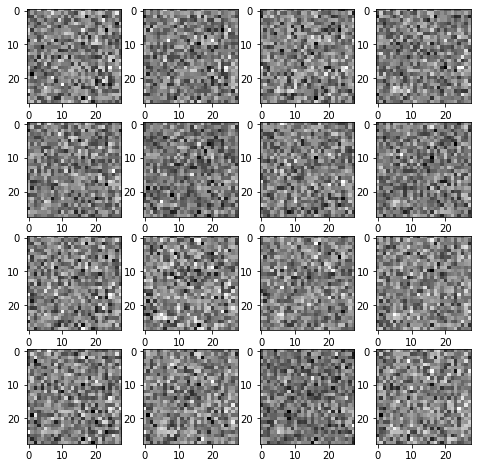

In [10]:
example_1 = sess.run(generator(z),feed_dict = {z: np.random.uniform(-1,1,size = [128,100])} )
fig=plt.figure(figsize=(8, 8))
for i in range(1,17):
    fig.add_subplot(4, 4, i)
    plt.imshow(example_1[i].reshape(28,28), cmap='gray_r')
plt.show()

  0%|          | 0/50000 [00:00<?, ?it/s]

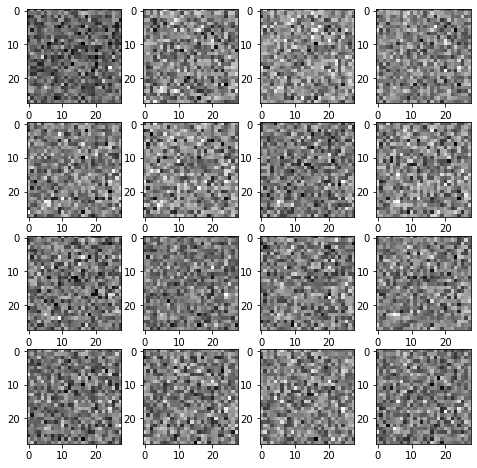


ITER:0
D_cur_loss:1.4375572204589844
G_cur_loss:0.6933761835098267



  2%|▏         | 998/50000 [00:18<13:56, 58.55it/s]  

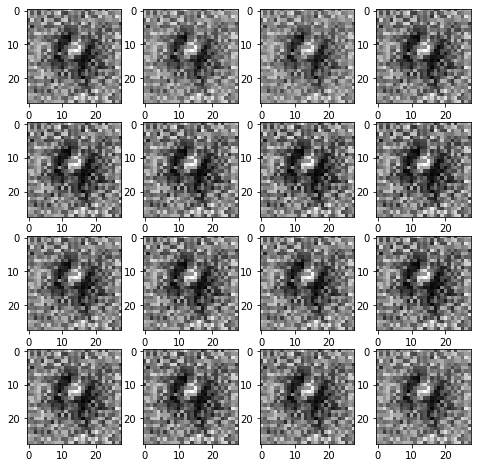


ITER:1000
D_cur_loss:1.6079728603363037
G_cur_loss:1.3136544227600098



  4%|▍         | 1995/50000 [00:38<13:51, 57.72it/s]  

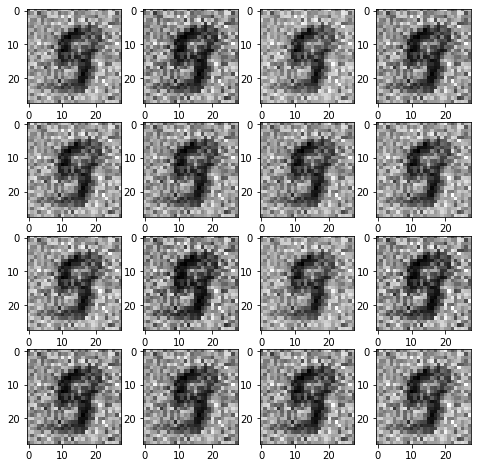


ITER:2000
D_cur_loss:1.3290135860443115
G_cur_loss:1.068799376487732



  6%|▌         | 2997/50000 [00:58<10:54, 71.84it/s]  

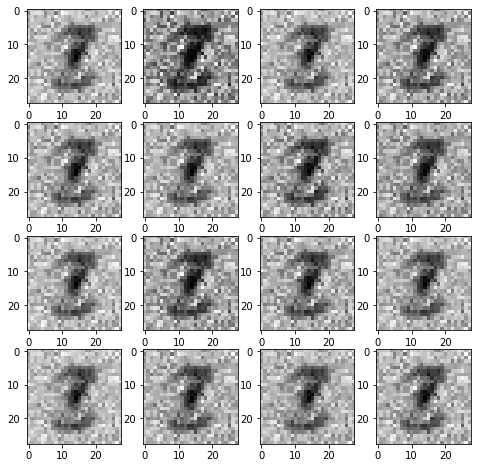


ITER:3000
D_cur_loss:1.3745143413543701
G_cur_loss:0.976163387298584



  8%|▊         | 3999/50000 [01:20<18:53, 40.57it/s]  

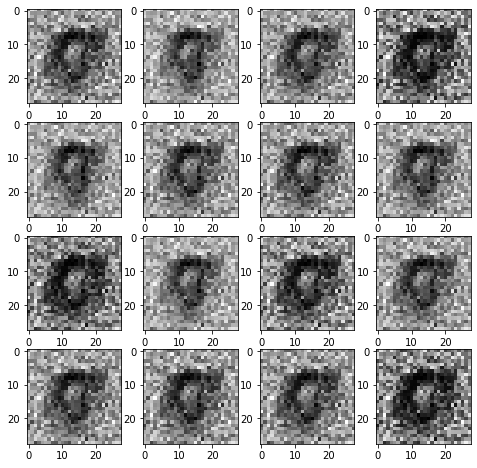


ITER:4000
D_cur_loss:1.1466525793075562
G_cur_loss:1.056037187576294



 10%|▉         | 4995/50000 [01:44<13:38, 54.98it/s]  

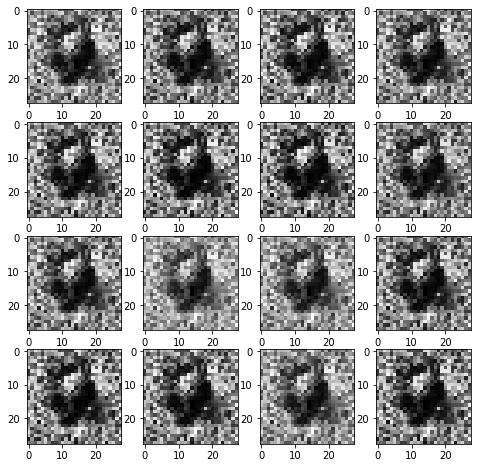


ITER:5000
D_cur_loss:1.1224836111068726
G_cur_loss:1.7371816635131836



 12%|█▏        | 5999/50000 [02:05<13:40, 53.62it/s]  

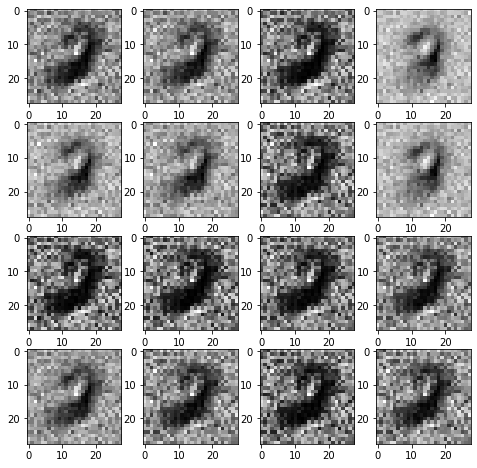


ITER:6000
D_cur_loss:1.2783000469207764
G_cur_loss:1.3073506355285645



 14%|█▍        | 6995/50000 [02:28<13:10, 54.43it/s]  

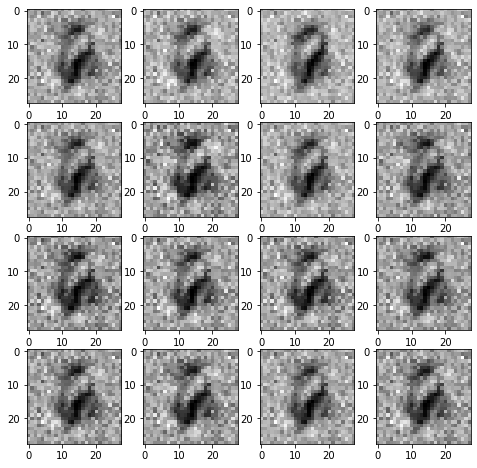


ITER:7000
D_cur_loss:1.1299407482147217
G_cur_loss:1.3050223588943481



 16%|█▌        | 7997/50000 [02:48<12:29, 56.07it/s]  

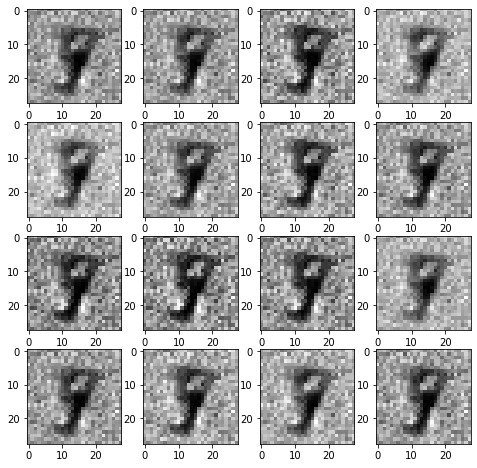


ITER:8000
D_cur_loss:1.2496548891067505
G_cur_loss:1.4061640501022339



 18%|█▊        | 9000/50000 [03:10<12:47, 53.42it/s]  

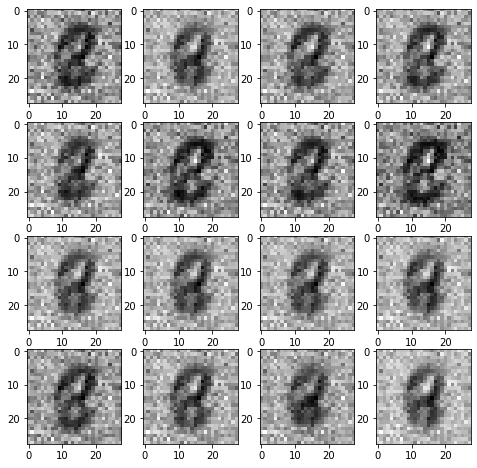


ITER:9000
D_cur_loss:1.1726505756378174
G_cur_loss:1.1985061168670654



 20%|█▉        | 9998/50000 [03:37<12:04, 55.19it/s]  

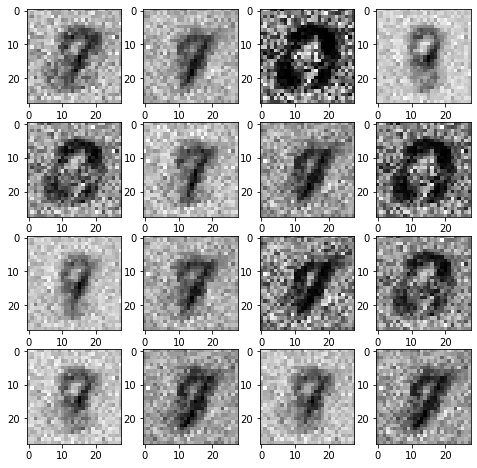


ITER:10000
D_cur_loss:1.021254062652588
G_cur_loss:1.3938753604888916



 22%|██▏       | 10996/50000 [03:59<12:04, 53.87it/s]  

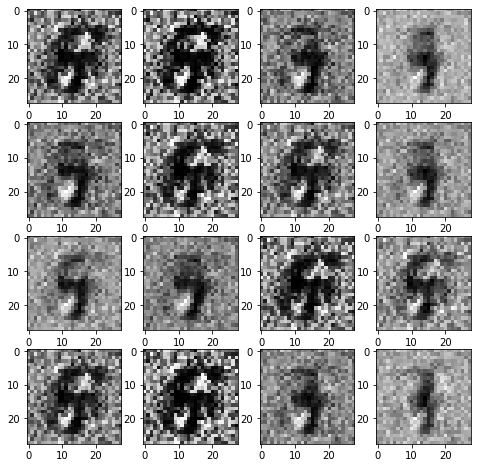


ITER:11000
D_cur_loss:1.1320492029190063
G_cur_loss:1.4388600587844849



 24%|██▍       | 11995/50000 [04:19<10:53, 58.19it/s]  

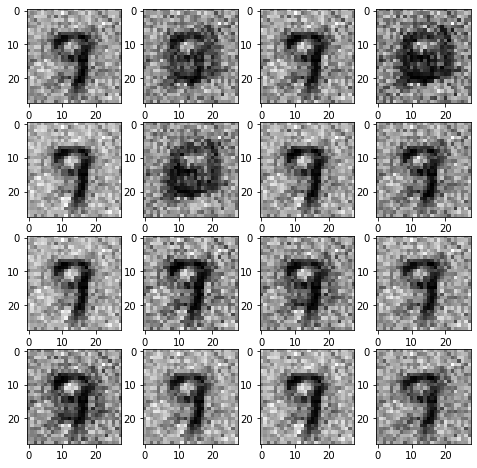


ITER:12000
D_cur_loss:1.1125911474227905
G_cur_loss:1.7967514991760254



 26%|██▌       | 12996/50000 [04:39<10:21, 59.53it/s]  

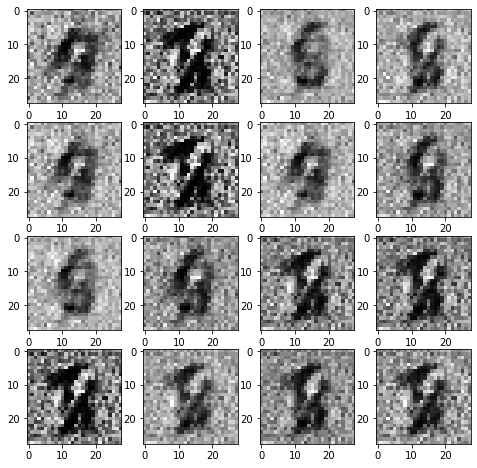


ITER:13000
D_cur_loss:1.1120799779891968
G_cur_loss:1.486670970916748



 28%|██▊       | 13997/50000 [04:59<10:36, 56.58it/s]  

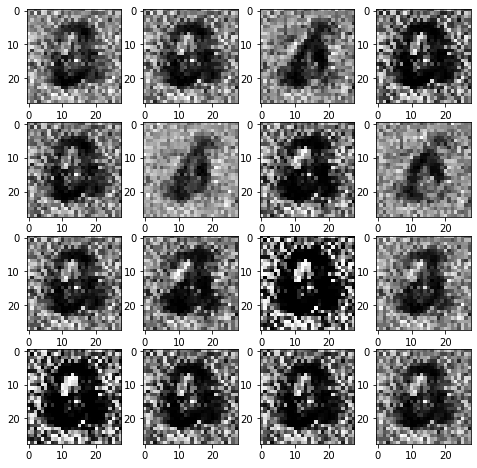


ITER:14000
D_cur_loss:1.4466789960861206
G_cur_loss:2.6256661415100098



 30%|███       | 15000/50000 [05:20<10:03, 57.98it/s]  

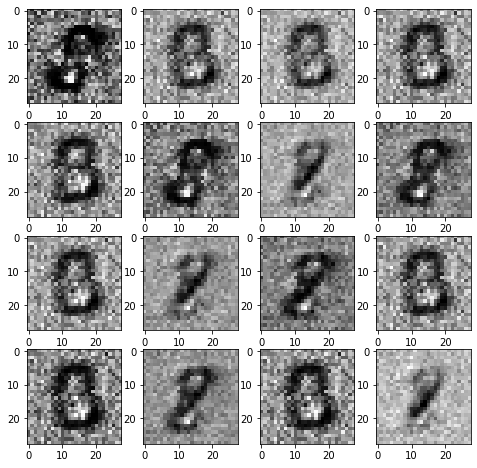


ITER:15000
D_cur_loss:0.8940705060958862
G_cur_loss:1.6907284259796143



 32%|███▏      | 16000/50000 [05:40<09:03, 62.55it/s]  

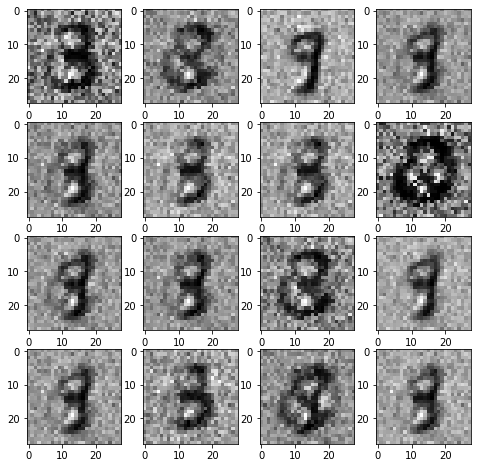


ITER:16000
D_cur_loss:0.9717838168144226
G_cur_loss:1.8933979272842407



 34%|███▍      | 16999/50000 [05:59<08:47, 62.55it/s]  

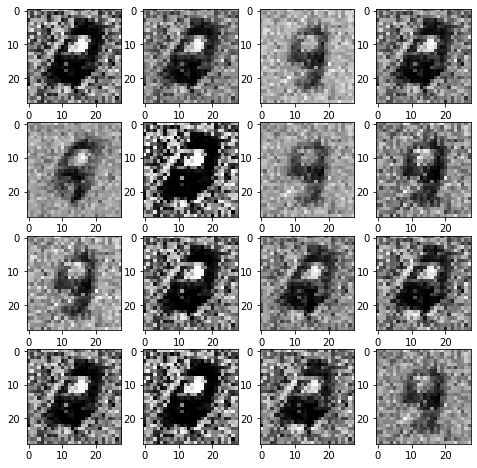


ITER:17000
D_cur_loss:0.637483537197113
G_cur_loss:2.0601024627685547



 36%|███▌      | 17995/50000 [06:19<09:08, 58.36it/s]  

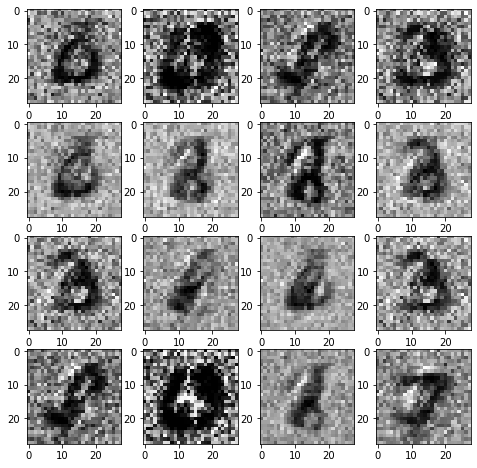


ITER:18000
D_cur_loss:1.059110164642334
G_cur_loss:1.5303852558135986



 38%|███▊      | 18996/50000 [06:43<12:34, 41.07it/s]  

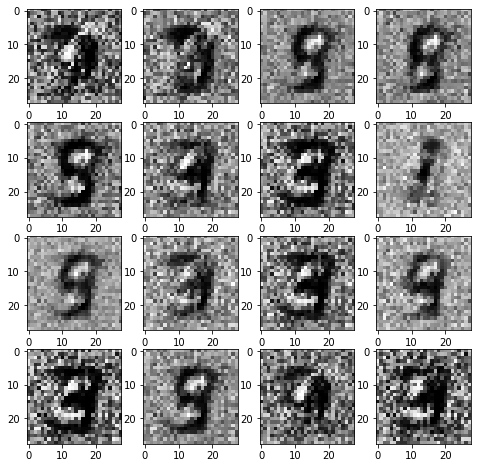


ITER:19000
D_cur_loss:0.9419012665748596
G_cur_loss:1.4864275455474854



 40%|███▉      | 19998/50000 [07:12<09:47, 51.07it/s]  

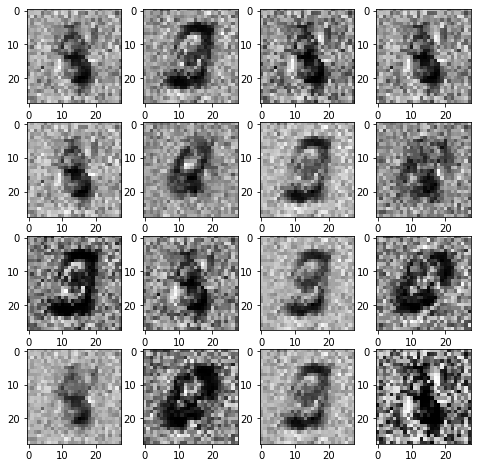


ITER:20000
D_cur_loss:1.1764942407608032
G_cur_loss:1.5279746055603027



 42%|████▏     | 20998/50000 [07:32<07:52, 61.40it/s]  

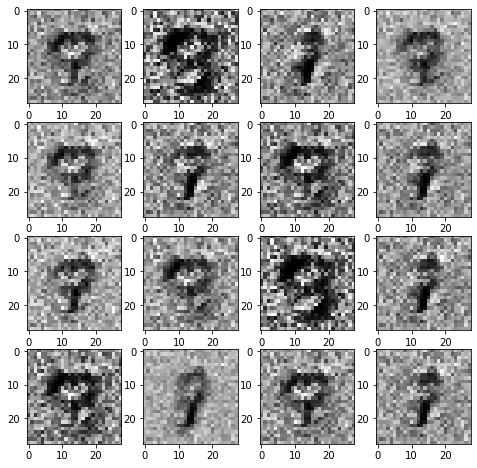


ITER:21000
D_cur_loss:1.0775989294052124
G_cur_loss:1.8736039400100708



 44%|████▍     | 21994/50000 [07:52<07:28, 62.47it/s]  

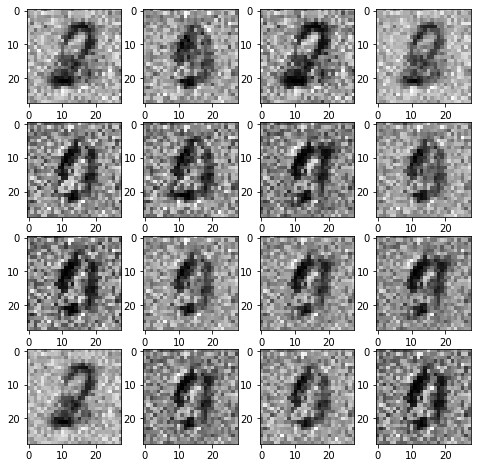


ITER:22000
D_cur_loss:1.054985523223877
G_cur_loss:1.743253469467163



 46%|████▌     | 22999/50000 [08:16<10:50, 41.51it/s]  

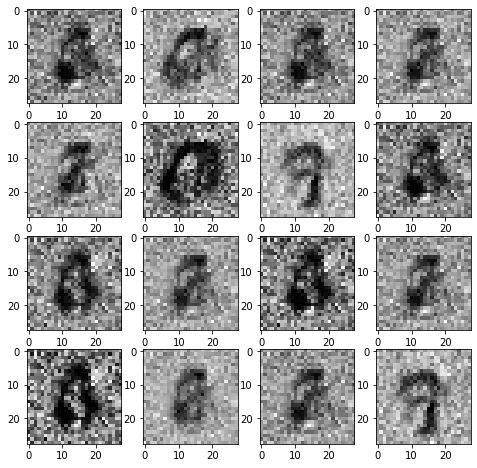


ITER:23000
D_cur_loss:0.7226667404174805
G_cur_loss:2.0710551738739014



 48%|████▊     | 24000/50000 [08:41<10:41, 40.54it/s]  

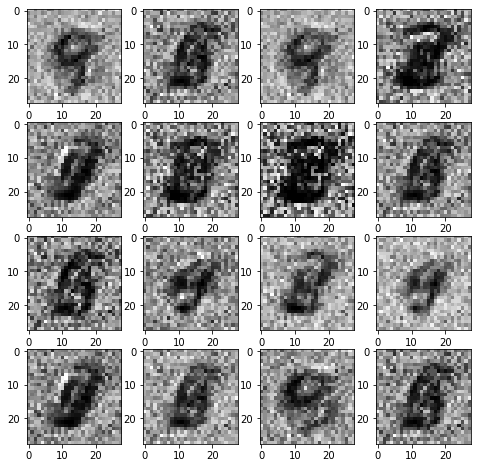


ITER:24000
D_cur_loss:1.0515897274017334
G_cur_loss:1.7294361591339111



 50%|████▉     | 24995/50000 [09:04<07:55, 52.58it/s]  

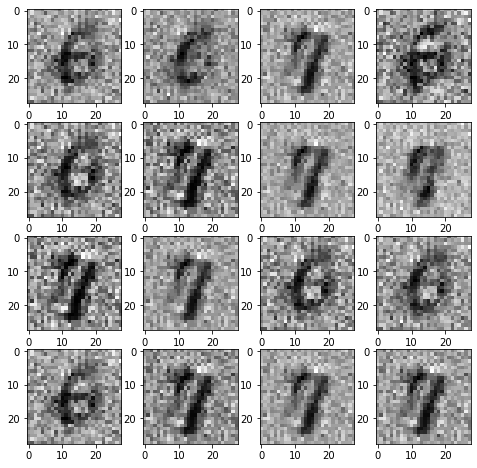


ITER:25000
D_cur_loss:0.5656498670578003
G_cur_loss:1.9854580163955688



 52%|█████▏    | 25995/50000 [09:23<06:25, 62.29it/s]  

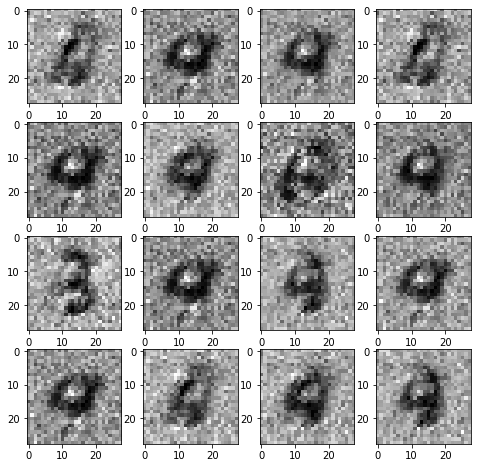


ITER:26000
D_cur_loss:0.6988505125045776
G_cur_loss:2.289043426513672



 54%|█████▍    | 26995/50000 [09:45<06:39, 57.54it/s]

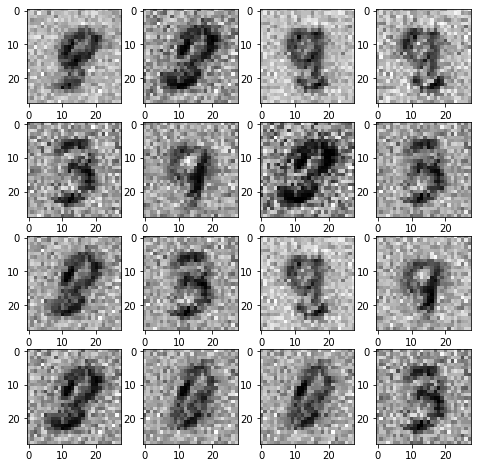


ITER:27000
D_cur_loss:0.4704382121562958
G_cur_loss:2.290146827697754



 56%|█████▌    | 27999/50000 [10:08<08:30, 43.07it/s]  

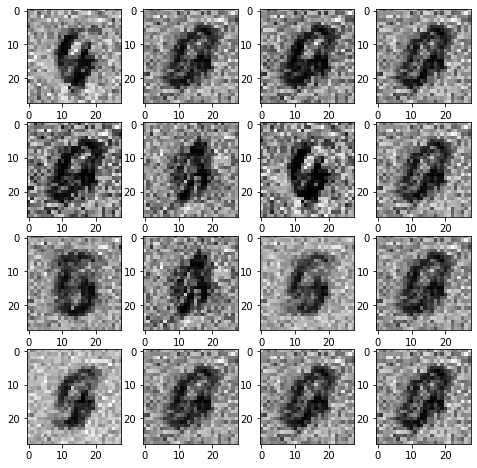


ITER:28000
D_cur_loss:0.9871702194213867
G_cur_loss:2.11177396774292



 58%|█████▊    | 28996/50000 [10:42<08:08, 42.99it/s]  

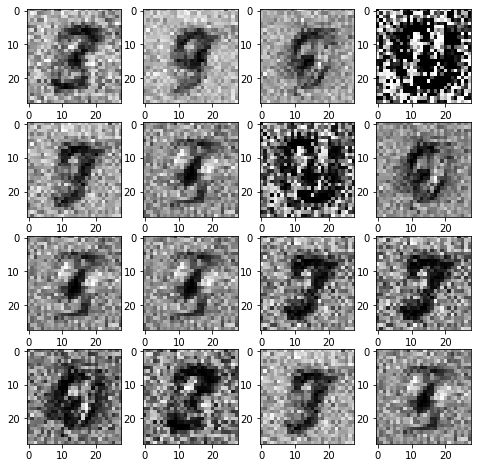


ITER:29000
D_cur_loss:1.033608078956604
G_cur_loss:2.6266214847564697



 60%|█████▉    | 29998/50000 [11:07<06:50, 48.77it/s]  

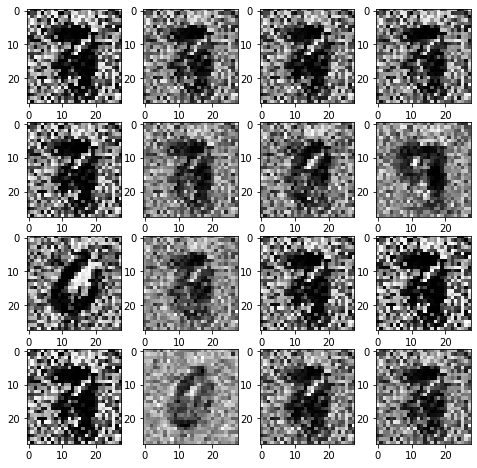


ITER:30000
D_cur_loss:0.8945655822753906
G_cur_loss:1.951366901397705



 62%|██████▏   | 30998/50000 [11:33<05:48, 54.54it/s]  

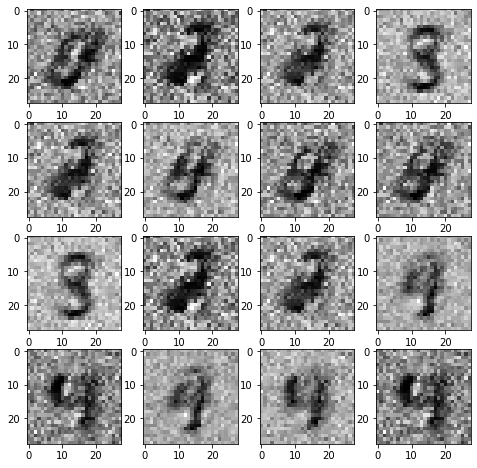


ITER:31000
D_cur_loss:0.9646949172019958
G_cur_loss:1.9132972955703735



 64%|██████▍   | 31999/50000 [11:57<05:29, 54.60it/s]  

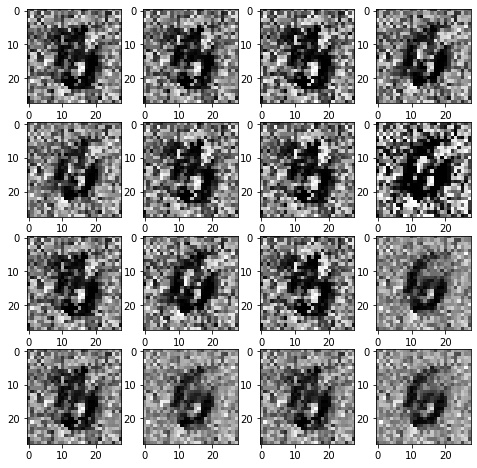


ITER:32000
D_cur_loss:1.0911024808883667
G_cur_loss:2.200054407119751



 66%|██████▌   | 32998/50000 [12:18<04:58, 56.88it/s]

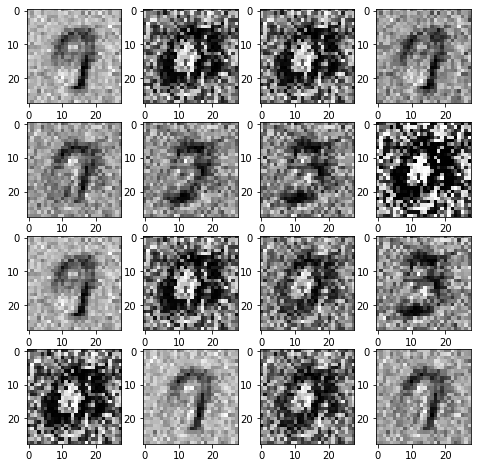


ITER:33000
D_cur_loss:1.1094038486480713
G_cur_loss:2.035900592803955



 68%|██████▊   | 33997/50000 [12:40<04:45, 56.10it/s]

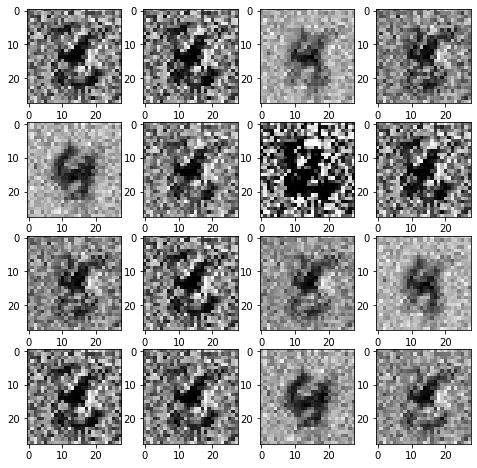


ITER:34000
D_cur_loss:0.778849720954895
G_cur_loss:2.0378265380859375



 70%|███████   | 35000/50000 [13:02<04:38, 53.91it/s]

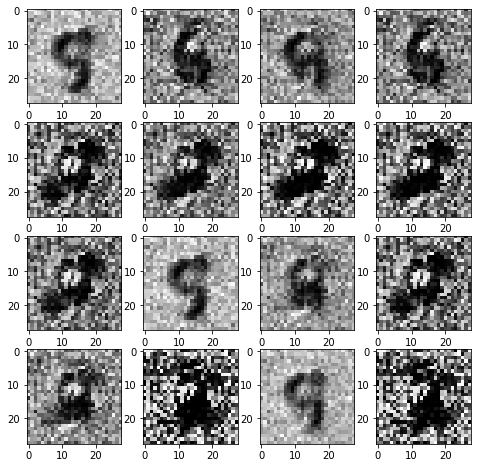


ITER:35000
D_cur_loss:0.8604211807250977
G_cur_loss:3.3675169944763184



 72%|███████▏  | 36000/50000 [13:24<04:16, 54.63it/s]

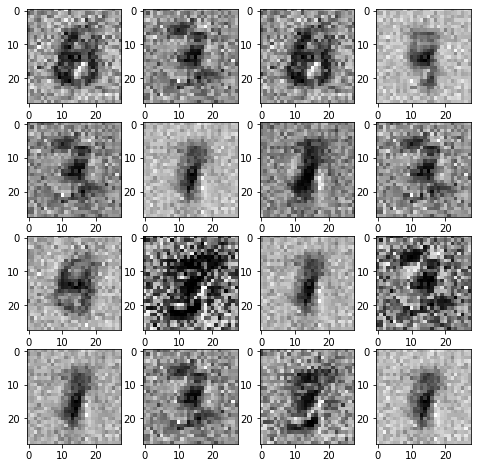


ITER:36000
D_cur_loss:1.0048624277114868
G_cur_loss:1.9847712516784668



 74%|███████▍  | 36995/50000 [13:46<03:57, 54.75it/s]

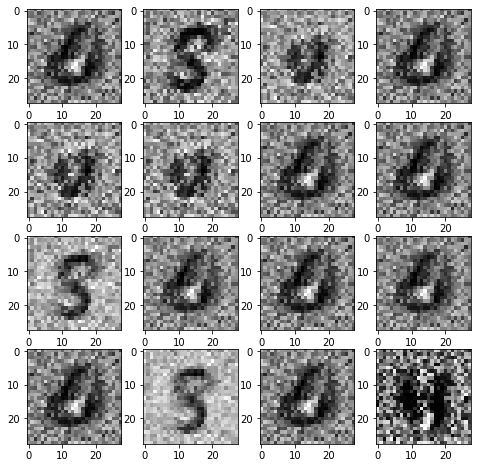


ITER:37000
D_cur_loss:0.8916629552841187
G_cur_loss:1.9155404567718506



 76%|███████▌  | 37994/50000 [14:07<03:42, 54.00it/s]

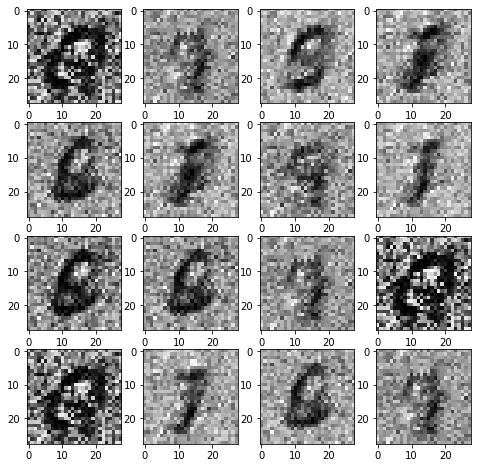


ITER:38000
D_cur_loss:0.8131677508354187
G_cur_loss:2.228220224380493



 78%|███████▊  | 38997/50000 [14:28<03:06, 59.00it/s]

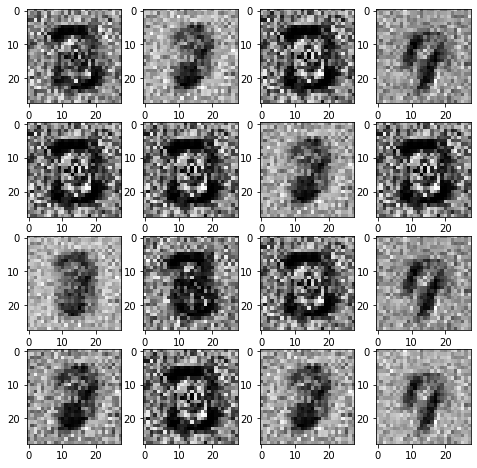


ITER:39000
D_cur_loss:0.7491600513458252
G_cur_loss:2.1863691806793213



 80%|███████▉  | 39998/50000 [14:49<03:01, 55.21it/s]

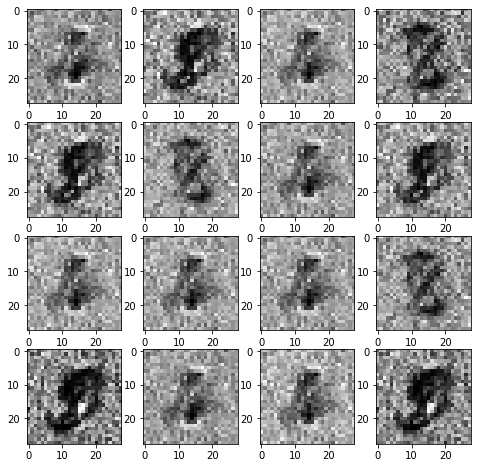


ITER:40000
D_cur_loss:0.6325836777687073
G_cur_loss:2.4819183349609375



 82%|████████▏ | 40999/50000 [15:11<02:51, 52.61it/s]

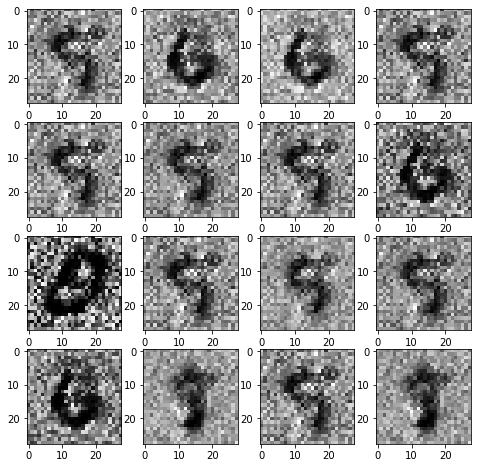


ITER:41000
D_cur_loss:0.5561562776565552
G_cur_loss:2.7228996753692627



 84%|████████▍ | 41999/50000 [15:32<02:20, 56.92it/s]

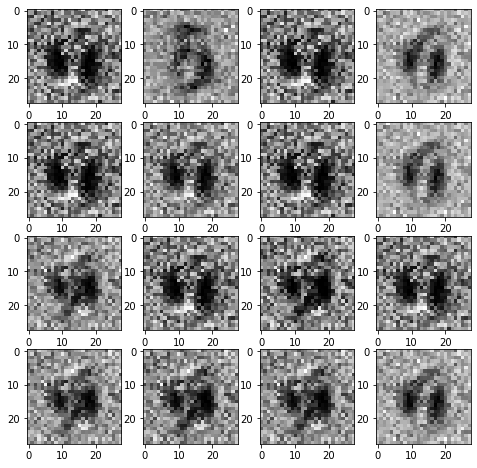


ITER:42000
D_cur_loss:0.44639426469802856
G_cur_loss:2.7289299964904785



 86%|████████▌ | 42997/50000 [15:54<02:20, 49.88it/s]

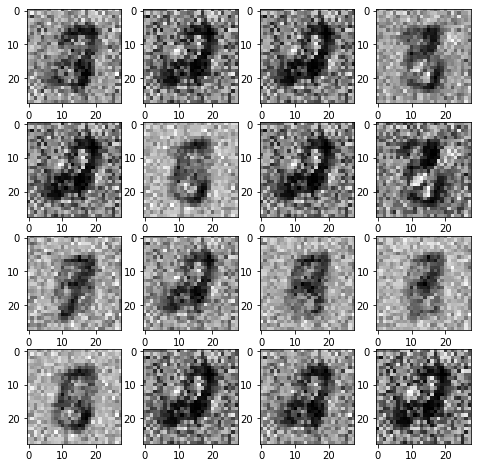


ITER:43000
D_cur_loss:0.47069868445396423
G_cur_loss:3.143599033355713



 88%|████████▊ | 43997/50000 [16:16<02:25, 41.14it/s]

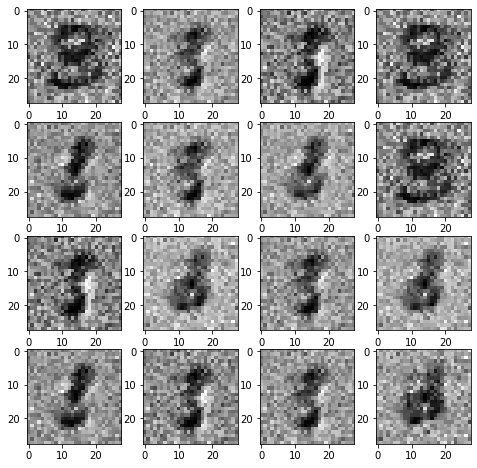


ITER:44000
D_cur_loss:0.6175813674926758
G_cur_loss:2.6334919929504395



 90%|████████▉ | 44998/50000 [16:41<01:41, 49.30it/s]

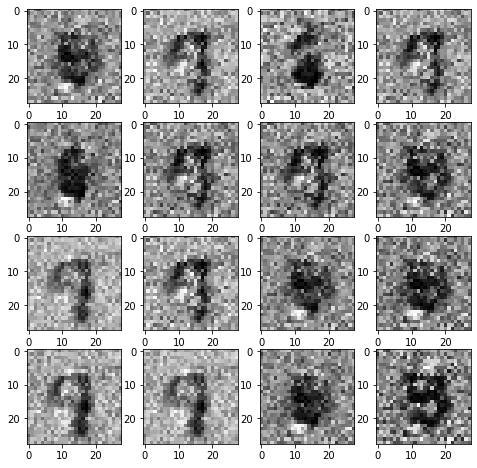


ITER:45000
D_cur_loss:0.9081714153289795
G_cur_loss:2.6719775199890137



 92%|█████████▏| 45993/50000 [17:01<01:17, 51.74it/s]

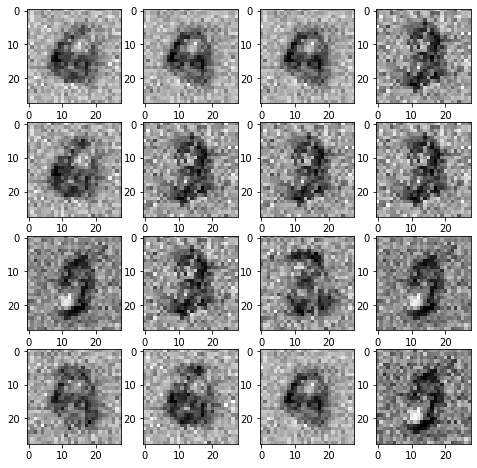


ITER:46000
D_cur_loss:0.7157126665115356
G_cur_loss:2.409834861755371



 94%|█████████▍| 46995/50000 [17:21<00:57, 52.48it/s]

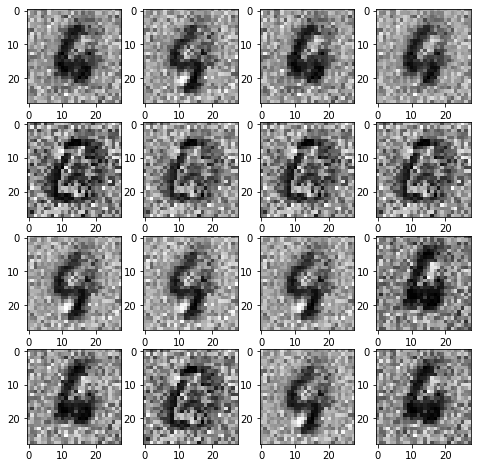


ITER:47000
D_cur_loss:0.6936646103858948
G_cur_loss:3.346237897872925



 96%|█████████▌| 47994/50000 [17:38<00:29, 67.54it/s]

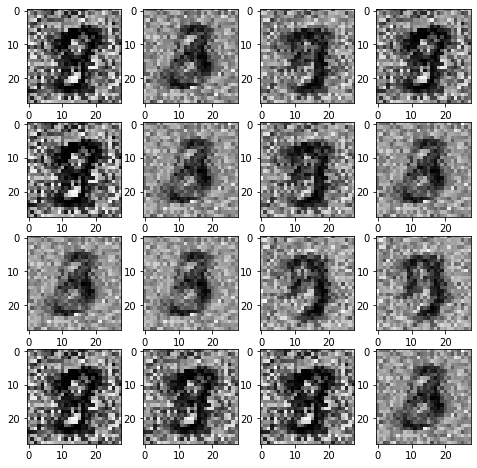


ITER:48000
D_cur_loss:0.5377068519592285
G_cur_loss:3.8244287967681885



 98%|█████████▊| 49000/50000 [18:00<00:22, 43.52it/s]

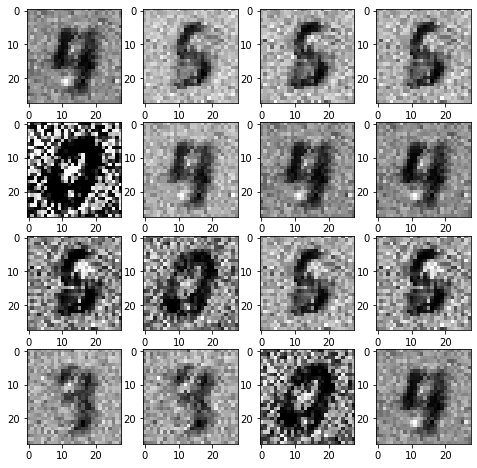


ITER:49000
D_cur_loss:0.6984633207321167
G_cur_loss:2.656867504119873



100%|██████████| 50000/50000 [18:19<00:00, 45.46it/s]


In [11]:
for i in tqdm(range(50000)):
    if i % 1000 == 0:
        example_1 = sess.run(generator(z),feed_dict = {z: np.random.uniform(-1,1,size = [128,100])} )
        #fig = show_images(example_1[:24])
        fig=plt.figure(figsize=(8, 8))
        for j in range(1,17):
            fig.add_subplot(4, 4, j)
            plt.imshow(example_1[j].reshape(28,28), cmap='gray_r')
        plt.show()
        print()
    X,_ = mnist.train.next_batch(128)
    _,d_cur_loss = sess.run([D_solver,d_loss],feed_dict = {x:X,z: np.random.uniform(-1,1,size = [128,100])})
    _,g_cur_loss = sess.run([G_solver,g_loss],feed_dict = {z: np.random.uniform(-1,1,size = [128,100])})

    if i % 1000 == 0:
        print('ITER:{}'.format(i))
        print('D_cur_loss:{}'.format(d_cur_loss))
        print('G_cur_loss:{}'.format(g_cur_loss))
        print()

### Conclusion

Compared to the baseline model, we cans see that the result is actually getting worse. In my opinion, that might be because of that our GAN is actually improving will the discriminator is not 